In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
df_train = pd.read_csv('train_data.txt', sep=":::", header=None, engine='python')
df_test = pd.read_csv('test_data.txt', sep=":::", header=None, engine='python')
df_test_sol = pd.read_csv('test_data_solution.txt', sep=":::", header=None, engine='python')

df_train.columns = ['SN', 'movie_name', 'Genre', 'confession']
df_test.columns = ['SN', 'movie_name', 'confession']
df_test_sol.columns = ['SN', 'movie_name', 'Genre', 'confession']
df_test.head()

,SN,movie_name,confession
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [3]:
df_train.head()

,SN,movie_name,Genre,confession
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54200 non-null  int64 
 1   movie_name  54200 non-null  object
 2   confession  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
df_train.describe()

,SN
count,51314.000000
mean,25657.500000
std,14813.220193
min,1.000000
25%,12829.250000
50%,25657.500000
75%,38485.750000
max,51314.000000


In [7]:
df_test.describe()

,SN
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [8]:
df_train.isnull().sum()

,0
SN,0
movie_name,0
Genre,0
confession,0


In [9]:
df_test.isnull().sum()

,0
SN,0
movie_name,0
confession,0


In [11]:
df_test.count()

,0
SN,54200
movie_name,54200
confession,54200


In [10]:
df_train.count()

,0
SN,51314
movie_name,51314
Genre,51314
confession,51314


In [12]:
df_train.iloc[0:5]

,SN,movie_name,Genre,confession
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [13]:
df_test.iloc[0]

,0
SN,1
movie_name,Edgar's Lunch (1998)
confession,"L.R. Brane loves his life - his car, his apar..."


In [14]:
df_train.shape

(51314, 4)

In [15]:
df_test.shape

(54200, 3)

<ipython-input-16-f3525436be2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df_train,order=df_train['Genre'].value_counts().index,palette='coolwarm',edgecolor=sns.color_palette('dark',7))


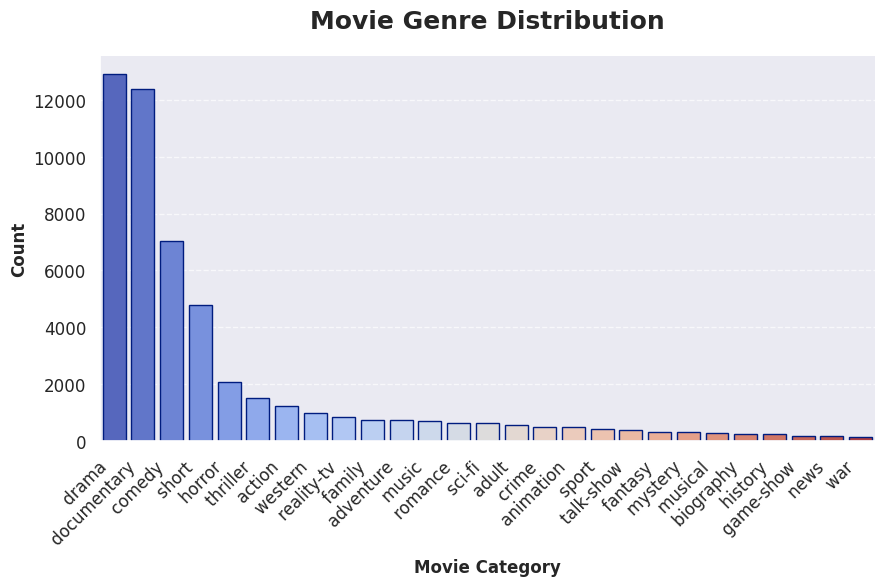

In [16]:
sns.set(style="darkgrid", palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.countplot(x='Genre', data=df_train,order=df_train['Genre'].value_counts().index,palette='coolwarm',edgecolor=sns.color_palette('dark',7))
plt.xlabel('Movie Category', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Movie Genre Distribution', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

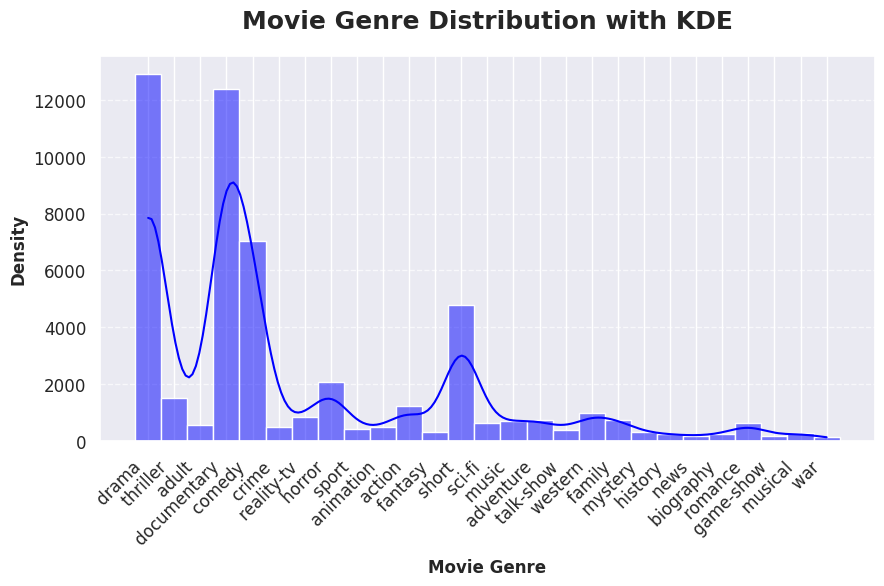

In [17]:
sns.histplot(df_train.Genre, kde=True, color="blue")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Movie Genre', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Movie Genre Distribution with KDE', fontsize=18, fontweight='bold', pad=20)
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0.5, 1.0, 'Genre Distribution')

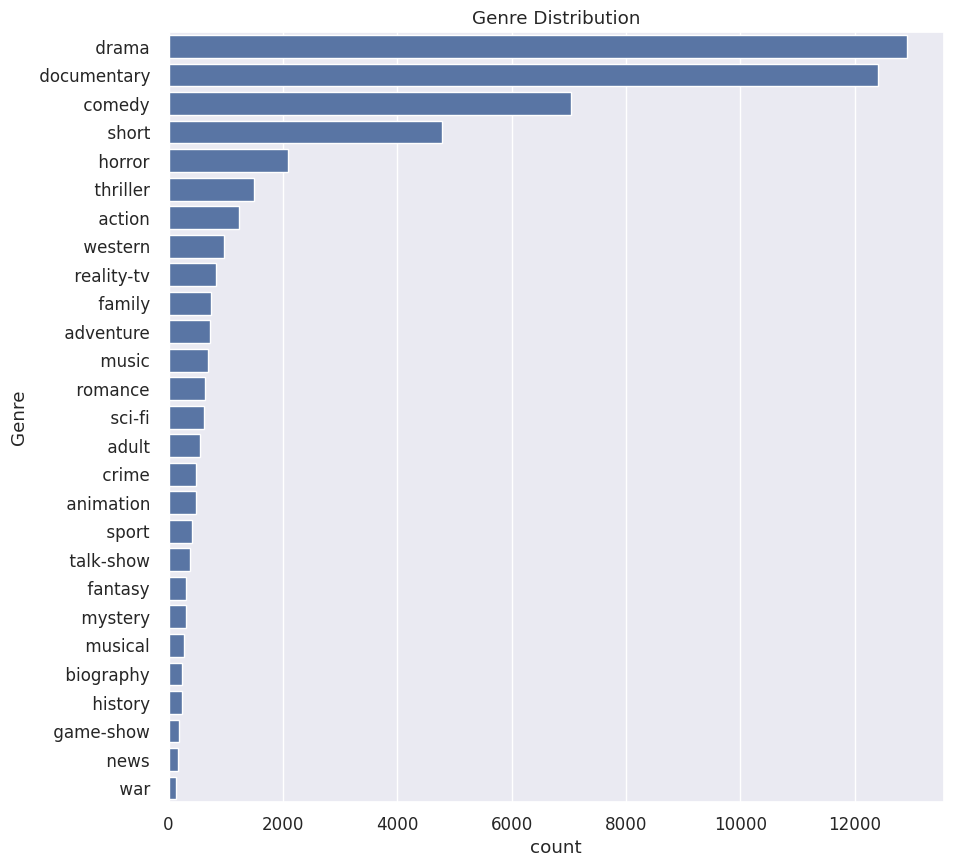

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_train,order= df_train["Genre"].value_counts().index,y="Genre")
plt.title("Genre Distribution")

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Genre'] = le.fit_transform(df_train['Genre'])

df_test_sol['Genre'] = le.fit_transform(df_test_sol['Genre'])

In [19]:
stemmer = LancasterStemmer()
stop_words=stopwords.words("english")

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

df_train['New_text'] = df_train['confession'].apply(clean_text)
df_test['New_text'] = df_test['confession'].apply(clean_text)

In [21]:
df_test.head()

,SN,movie_name,confession,New_text
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [20]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(df_train['New_text'])
X_test = tfidf.transform(df_test['New_text'])

In [22]:
X = X_train
y = df_train['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [26]:
y_pred = nb.predict(X_val)

In [25]:
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.43934522069570303


In [27]:
print(classification_report(y_val, y_pred))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00       247
       adult        0.00      0.00      0.00       107
   adventure        0.00      0.00      0.00       143
   animation        0.00      0.00      0.00        85
   biography        0.00      0.00      0.00        42
      comedy        0.78      0.05      0.09      1368
       crime        0.00      0.00      0.00        80
 documentary        0.51      0.89      0.65      2412
       drama        0.38      0.87      0.53      2633
      family        0.00      0.00      0.00       160
     fantasy        0.00      0.00      0.00        50
   game-show        0.00      0.00      0.00        35
     history        0.00      0.00      0.00        44
      horror        0.00      0.00      0.00       419
       music        0.00      0.00      0.00       167
     musical        0.00      0.00      0.00        65
     mystery        0.00      0.00      0.00        53
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
X_test_predictions = nb.predict(X_test)
df_test['Predicted_Genre'] = X_test_predictions

In [31]:
df_test.to_csv('predicted_genres.csv', index=False)
print(df_test)

          SN                        movie_name  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                              confession  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    

In [34]:
from sklearn.svm import LinearSVC

svc_model=LinearSVC(penalty='l2',C=0.1,dual=False)
svc_model.fit(X_train,y_train)

LinearSVC(C=0.1, dual=False)

In [35]:
y_train_pred2=svc_model.predict(X_train)
print(classification_report(y_train,y_train_pred2))

               precision    recall  f1-score   support

      action        0.92      0.51      0.65       994
       adult        0.96      0.60      0.74       451
   adventure        0.95      0.35      0.51       591
   animation        1.00      0.37      0.54       388
   biography        1.00      0.01      0.01       197
      comedy        0.75      0.77      0.76      5665
       crime        0.98      0.14      0.25       400
 documentary        0.73      0.96      0.83      9985
       drama        0.65      0.91      0.76     10272
      family        0.98      0.23      0.37       586
     fantasy        0.98      0.24      0.38       260
   game-show        0.94      0.78      0.85       152
     history        1.00      0.01      0.02       185
      horror        0.81      0.81      0.81      1669
       music        0.90      0.63      0.74       530
     musical        0.96      0.13      0.23       200
     mystery        1.00      0.14      0.25       251
        n

In [37]:
y_val_pred2=svc_model.predict(X_val)
print(classification_report(y_val,y_val_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.56      0.18      0.28       247
       adult        0.66      0.21      0.32       107
   adventure        0.77      0.16      0.27       143
   animation        1.00      0.04      0.07        85
   biography        0.00      0.00      0.00        42
      comedy        0.54      0.56      0.55      1368
       crime        0.50      0.01      0.02        80
 documentary        0.61      0.89      0.72      2412
       drama        0.54      0.80      0.64      2633
      family        0.55      0.04      0.07       160
     fantasy        0.00      0.00      0.00        50
   game-show        0.85      0.63      0.72        35
     history        0.00      0.00      0.00        44
      horror        0.65      0.61      0.63       419
       music        0.80      0.33      0.47       167
     musical        0.00      0.00      0.00        65
     mystery        0.00      0.00      0.00        53
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:

import pandas as pd
def predict_genre(title, description, model, vectorizer, label_encoder):
    data = pd.DataFrame({'confession': [description]})
    data['New_text'] = data['confession'].apply(clean_text)
    X_new = vectorizer.transform(data['New_text'])
    y_pred = model.predict(X_new)
    predicted_genre = label_encoder.inverse_transform(y_pred)
    print(predicted_genre)


In [62]:
predict_genre("Edgar's Lunch (1998)","L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.",svc_model,tfidf,le)

ValueError: y contains previously unseen labels: [' drama ']

In [ ]:
# prompt: Error                                Traceback (most recent call last)
# <ipython-input-51-b3eee41f5e76> in <cell line: 1>()
# ----> 1 predict_genre("Edgar's Lunch (1998)","L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick tri

import pandas as pd
def predict_genre(title, description, model, vectorizer, label_encoder):
    data = pd.DataFrame({'confession': [description]})
    data['New_text'] = data['confession'].apply(clean_text)
    X_new = vectorizer.transform(data['New_text'])
    y_pred = model.predict(X_new)
    predicted_genre = label_encoder.inverse_transform(y_pred)
    print(predicted_genre)

predict_genre("Edgar's Lunch (1998)","L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick tri",svc_model,tfidf,le)
